Titanic - Machine learning from Disaster

This is my first attempt at a Kaggle competition. This is a continuous project where I update and add code as I learn more data analysis/ML principles

Below are all of my imported libraries I use for DA/ML as well as loading in the training data and test data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

train_data = pd.read_csv(r"C:\Users\Dillon Rainwater\Documents\Python\Kaggle Competitions\Titanic\titanic data\train.csv")
test_data = pd.read_csv(r"C:\Users\Dillon Rainwater\Documents\Python\Kaggle Competitions\Titanic\titanic data\test.csv")


Below is a quick exploratory data analysis (EDA). Since most of the important features are categorical, simple bar graphs are quite effective at gaining insights on how features are correlated.

In [2]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
num_rows = len(train_data)
num_rows


891

In [4]:
#finding missing values
missing_data_train = train_data.isna().sum()
missing_data_train = missing_data_train[missing_data_train > 0]
missing_data_train


Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
missing_data_test = test_data.isna().sum()
missing_data_test = missing_data_test[missing_data_test > 0]
missing_data_test


Age       86
Fare       1
Cabin    327
dtype: int64

In [6]:
survived_data = train_data.loc[train_data['Survived'] == 1]
survived_data.mean(skipna=True)


PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

In [7]:
died_data = train_data.loc[train_data['Survived'] == 0]
died_data.mean(skipna=True)


PassengerId    447.016393
Survived         0.000000
Pclass           2.531876
Age             30.626179
SibSp            0.553734
Parch            0.329690
Fare            22.117887
dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

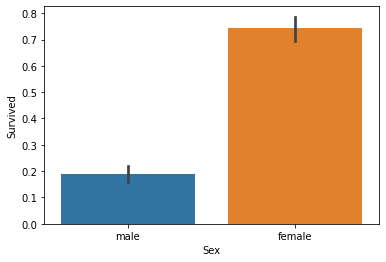

In [8]:
sb.barplot(x="Sex", y="Survived", data=train_data)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

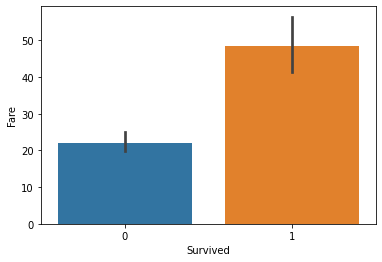

In [9]:
sb.barplot(x='Survived', y='Fare', data=train_data)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

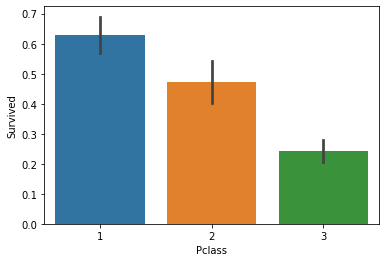

In [10]:
sb.barplot(x='Pclass', y='Survived', data=train_data)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

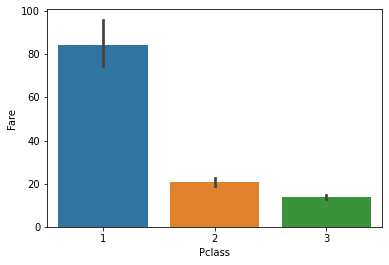

In [11]:
sb.barplot(x='Pclass', y='Fare', data=train_data)


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

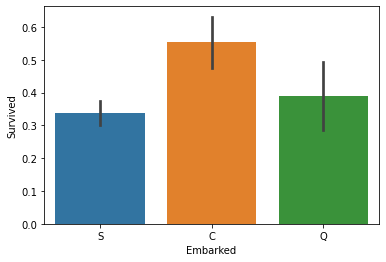

In [12]:
sb.barplot(x='Embarked', y='Survived', data=train_data)


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

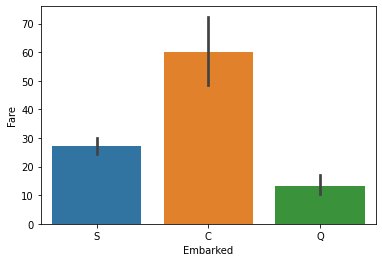

In [13]:
sb.barplot(x="Embarked", y='Fare', data=train_data)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

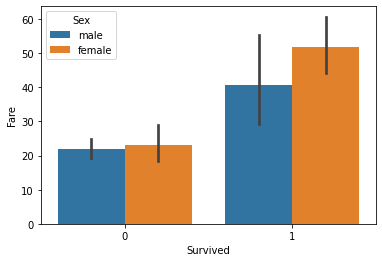

In [14]:
sb.barplot(x='Survived', y='Fare', hue='Sex', data=train_data)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

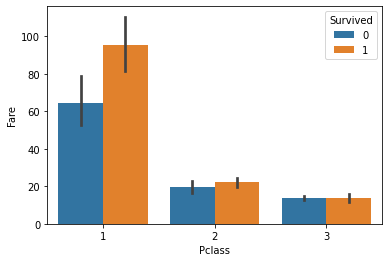

In [15]:
sb.barplot(x='Pclass', y='Fare', hue='Survived', data=train_data)


C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


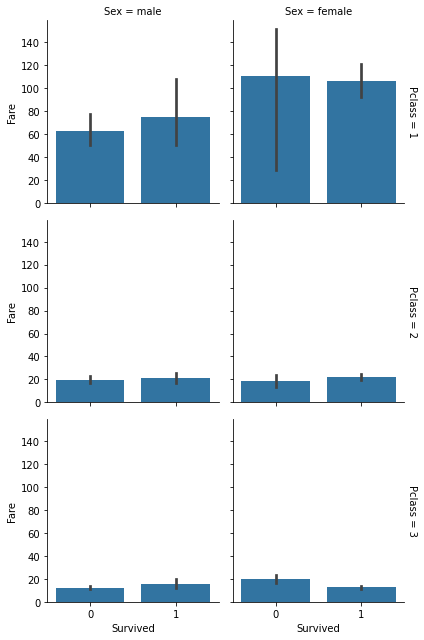

In [16]:
g = sb.FacetGrid(data=train_data, row="Pclass", col="Sex", margin_titles=True)
g.map(sb.barplot, "Survived", "Fare")


<Figure size 432x288 with 0 Axes>

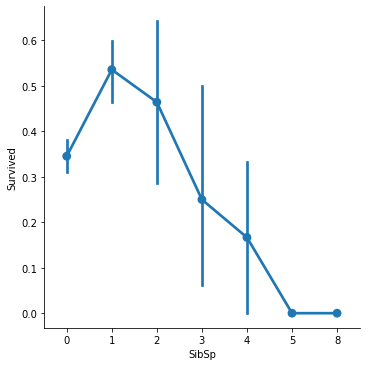

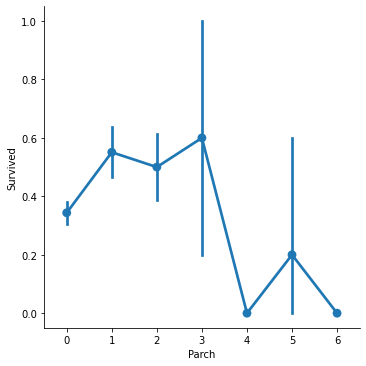

In [17]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sb.catplot(x = col, y = 'Survived', data = train_data, kind = 'point')


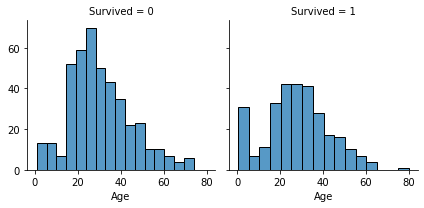

In [18]:
g = sb.FacetGrid(data=train_data, col="Survived", margin_titles=True)
g.map(sb.histplot, "Age")


Text(0.5, 1.0, 'Correlation between Features in train_data')

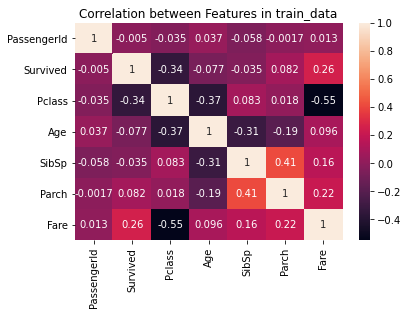

In [19]:
sb.heatmap(train_data.corr(), annot = True)
plt.title('Correlation between Features in train_data')


Below I delete the few rows where there was no data in 'Emabarked' and 'Fare'.
I impute the 'Age' feature to replace empty values with the average age.

Rather than having 'Cabin' as a feature with many different unique values, I created a feature 'cabin _missing' that indicates whether or not there was a cabin recoreded for the passenger. The barplot of 'cabin_missing' shows that there is some correlation between having a cabin and surviving.

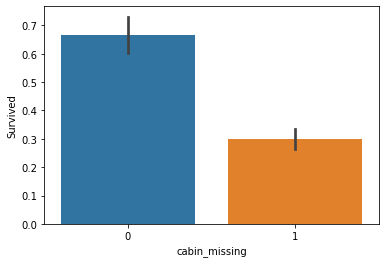

In [20]:
# Dealing with missing values
train_data['cabin_missing'] = np.where(train_data['Cabin'].isnull(), 1, 0)
sb.barplot(x='cabin_missing', y='Survived', data=train_data)
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data.drop(train_data.loc[train_data['Embarked'].isna() == True].index, inplace=True)

# apply to test_data as well
test_data['cabin_missing'] = np.where(test_data['Cabin'].isnull(), 1, 0)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

test_data.drop(test_data.loc[test_data['Fare'].isna() == True].index, inplace=True)


Here I set up my features for training my models. I also split my data into test and training sets.

I use pd.get_dummies to convert the categorical features to numerical ones and I also normalize the data to a range of [0,1]

In [21]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "Fare", "Embarked", "cabin_missing", "Age", 'SibSp', 'Parch']
X = pd.get_dummies(train_data[features])
X_test_data = pd.get_dummies(test_data[features])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0)

# normalizing data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)


Below I created a function for finding the accuaracy score of the model given a specific n_estimators. However, this only tests one parameter of the model and I quickly found a better way to test paramaters using GridsearchCV

I chose a couple of classifiers (Random Forest and Gradient Boosting) to test since we are trying to classify if a paseenger has 'survived' or 'not survived'

In [22]:
def get_RandomForest_scores(n_estimators):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=4)
    scores = cross_val_score(model, X, y, cv=5)
    return(scores)

for n in [5,10,50,100,250,500]:
    print(get_RandomForest_scores(n))
    print(get_RandomForest_scores(n).mean())


[0.76404494 0.80337079 0.83146067 0.79213483 0.83615819]
0.8054338856090902
[0.78651685 0.82022472 0.83146067 0.78651685 0.84180791]
0.813305402145623
[0.79213483 0.78651685 0.84831461 0.76404494 0.85310734]
0.8088237161175649
[0.79213483 0.79213483 0.85393258 0.78651685 0.85310734]
0.8155652891512728
[0.79213483 0.79775281 0.83146067 0.78089888 0.85310734]
0.8110709071288008
[0.78651685 0.79213483 0.83146067 0.78651685 0.85310734]
0.8099473116231829


In [23]:
def get_GradientBossting_scores(n_estimators):
    model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    scores = cross_val_score(model, X, y, cv=5)
    return(scores)

for n in [5,10,50,100,250,500]:
    print(get_GradientBossting_scores(n))
    print(get_GradientBossting_scores(n).mean())



[0.74719101 0.80337079 0.82022472 0.78089888 0.82485876]
0.7953088300641149
[0.80898876 0.81460674 0.82022472 0.78651685 0.81920904]
0.8099092236399417
[0.79213483 0.80898876 0.83707865 0.80337079 0.84745763]
0.8178061321653018
[0.79213483 0.81460674 0.84269663 0.80337079 0.85875706]
0.8223132101821875
[0.80337079 0.81460674 0.87078652 0.79213483 0.84745763]
0.8256713007046276
[0.81460674 0.80337079 0.85393258 0.79213483 0.83615819]
0.820040627182124


Below I use GridSearchCV to to test multiple hyper parameters and highlight the best ones based on the default scorer (accuracy score).

In [24]:
# Using GridSearchCV to find best hyperparameters

rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
params = {
    'n_estimators': [5, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, params, cv = 5, n_jobs = -1)
cv.fit(X_train_norm, Y_train)
cv.best_params_


{'max_depth': 8, 'n_estimators': 250}

In [25]:

gb = GradientBoostingClassifier(random_state = 0)
params = {
    'n_estimators': [5, 50, 100, 250],
    'max_depth': [2, 4, 8, 16, 32, None],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, params, cv = 5, n_jobs = -1)
cv.fit(X_train_norm, Y_train)
cv.best_params_


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [26]:
model = RandomForestClassifier(n_estimators=250, max_depth=8, random_state=0)
model.fit(X_train_norm, Y_train)
score = model.score(X_train_norm, Y_train)
print(score)
rf_predictions = model.predict(X_test_norm)


0.9309309309309309


In [27]:
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=50)
model.fit(X_train_norm, Y_train)
score = model.score(X_train_norm, Y_train)
print(score)
gb_predictions = model.predict(X_test_norm)


0.9129129129129129


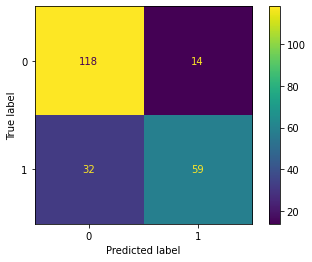

In [28]:
cm = confusion_matrix(Y_test, rf_predictions)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()


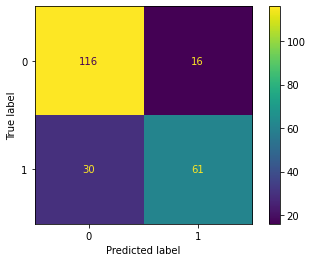

In [29]:
cm = confusion_matrix(Y_test, gb_predictions)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()


In [30]:
#predictions output to submission file
#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': rf_predictions})
#output.to_csv('titanic_submission.csv', index=False)


ValueError: array length 223 does not match index length 417